In [1]:
import numpy as np
import ast
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, GlobalAveragePooling1D, Concatenate, LayerNormalization, MultiHeadAttention, Masking
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from collections import Counter
from sklearn.utils import class_weight


2025-04-25 03:11:34.786630: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-25 03:11:34.824531: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-25 03:11:35.333338: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train = pd.read_csv('/home/shatha/projects_unix/hyolo/test_labeled2.csv')
test = pd.read_csv('/home/shatha/projects_unix/hyolo/test_labeled2.csv')

In [3]:
train 

,NoFrames,nose_X,nose_Y,rightEye_X,rightEye_Y,leftEye_X,leftEye_Y,rightEar_X,rightEar_Y,leftEar_X,...,indexDIP_left_X,indexDIP_left_Y,indexPIP_left_X,indexPIP_left_Y,indexTIP_left_X,indexTIP_left_Y,wrist_left_X,wrist_left_Y,SignID,label_event
0,53,"[0.5790374875068665, 0.5791797637939453, 0.579...","[0.5047855973243713, 0.5149669647216797, 0.513...","[0.5633554458618164, 0.5631381273269653, 0.563...","[0.48247256875038147, 0.4924033284187317, 0.49...","[0.5891590118408203, 0.5883314609527588, 0.588...","[0.477821409702301, 0.48805829882621765, 0.489...","[0.5485674738883972, 0.5484708547592163, 0.548...","[0.4938674867153168, 0.502764880657196, 0.4999...","[0.5995656251907349, 0.5974187254905701, 0.597...",...,"[0.6868985295295715, 0.6856703758239746, 0.684...","[0.8153769969940186, 0.8174228668212891, 0.818...","[0.694340705871582, 0.692534327507019, 0.69161...","[0.8211683034896851, 0.8228912353515625, 0.824...","[0.6807295083999634, 0.6799083948135376, 0.678...","[0.8088198304176331, 0.8116485476493835, 0.812...","[0.6648371815681458, 0.664013683795929, 0.6643...","[0.7929478883743286, 0.7935417890548706, 0.792...",200,مخالفة
1,45,"[0.5806422829627991, 0.5816341042518616, 0.582...","[0.5366215109825134, 0.532362699508667, 0.5301...","[0.563186526298523, 0.5644673705101013, 0.5653...","[0.5116226077079773, 0.5074396729469299, 0.505...","[0.588361918926239, 0.5890452861785889, 0.5897...","[0.5092732906341553, 0.5056613683700562, 0.503...","[0.5487489700317383, 0.5492830872535706, 0.549...","[0.5148866176605225, 0.5125274658203125, 0.510...","[0.5972700715065002, 0.5978253483772278, 0.598...",...,"[0.6876047253608704, 0.685725212097168, 0.6849...","[0.8339130878448486, 0.8333160281181335, 0.834...","[0.6930723786354065, 0.692287266254425, 0.6913...","[0.8316420316696167, 0.8343323469161987, 0.835...","[0.6813584566116333, 0.6788910627365112, 0.678...","[0.8313649296760559, 0.830103874206543, 0.8307...","[0.6617196202278137, 0.6617619395256042, 0.662...","[0.7995233535766602, 0.8003800511360168, 0.800...",200,مخالفة
2,57,"[0.583163321018219, 0.5819709300994873, 0.5815...","[0.5537827014923096, 0.5552886128425598, 0.557...","[0.567791223526001, 0.5659781694412231, 0.5652...","[0.5238949656486511, 0.52513188123703, 0.52648...","[0.5926048755645752, 0.5919034481048584, 0.591...","[0.5257792472839355, 0.5263620018959045, 0.527...","[0.5530923008918762, 0.5523162484169006, 0.551...","[0.5172417163848877, 0.5185633301734924, 0.519...","[0.6023428440093994, 0.6024838089942932, 0.602...",...,"[0.6748271584510803, 0.6721789836883545, 0.668...","[0.8685122132301331, 0.8682038187980652, 0.865...","[0.6829285621643066, 0.680170476436615, 0.6769...","[0.8713919520378113, 0.8718703389167786, 0.869...","[0.667277991771698, 0.665009617805481, 0.66167...","[0.8630794286727905, 0.8626329898834229, 0.858...","[0.662631630897522, 0.6614423990249634, 0.6595...","[0.8221224546432495, 0.8187688589096069, 0.816...",200,مخالفة
3,60,"[0.5799688100814819, 0.5797230005264282, 0.579...","[0.5498757362365723, 0.5497108101844788, 0.549...","[0.5635773539543152, 0.5631383657455444, 0.562...","[0.521105170249939, 0.5211318135261536, 0.5217...","[0.5899789333343506, 0.5898411870002747, 0.589...","[0.5207926034927368, 0.5205640196800232, 0.520...","[0.5503963232040405, 0.5501256585121155, 0.549...","[0.5177019238471985, 0.5191729664802551, 0.520...","[0.600274384021759, 0.6002183556556702, 0.6001...",...,"[0.6834303140640259, 0.6828553676605225, 0.682...","[0.8719803094863892, 0.8719385862350464, 0.872...","[0.6907673478126526, 0.6903473734855652, 0.689...","[0.8748729228973389, 0.8743409514427185, 0.875...","[0.6762145757675171, 0.6756492257118225, 0.675...","[0.864814817905426, 0.8661708831787109, 0.8658...","[0.6641945242881775, 0.6647439002990723, 0.664...","[0.8227871656417847, 0.8203953504562378, 0.820...",200,مخالفة
4,48,"[0.5789957046508789, 0.5804620385169983, 0.580...","[0.43962228298187256, 0.4265539050102234, 0.42...","[0.562684953212738, 0.563047349

In [4]:

num_train_samples = train['label_event'].nunique()
num_test_samples = test['label_event'].nunique()

print(f" عدد عينات التدريب: {num_train_samples}")
print(f" عدد عينات الاختبار: {num_test_samples}")

 عدد عينات التدريب: 8
 عدد عينات الاختبار: 8


In [5]:
test.tail()

,NoFrames,nose_X,nose_Y,rightEye_X,rightEye_Y,leftEye_X,leftEye_Y,rightEar_X,rightEar_Y,leftEar_X,...,indexDIP_left_X,indexDIP_left_Y,indexPIP_left_X,indexPIP_left_Y,indexTIP_left_X,indexTIP_left_Y,wrist_left_X,wrist_left_Y,SignID,label_event
59,29,"[0.6200305223464966, 0.6186570525169373, 0.618...","[0.41644763946533203, 0.4164765775203705, 0.41...","[0.6054266691207886, 0.6044172644615173, 0.604...","[0.3958180844783783, 0.3958779275417328, 0.395...","[0.6290295124053955, 0.6284139752388, 0.628154...","[0.39585980772972107, 0.39588096737861633, 0.3...","[0.5891163945198059, 0.5884628295898438, 0.588...","[0.40543609857559204, 0.40546515583992004, 0.4...","[0.6385466456413269, 0.6385391354560852, 0.638...",...,"[0.6340845227241516, 0.6372582912445068, 0.638...","[0.47689399123191833, 0.4747624695301056, 0.47...","[0.6435937285423279, 0.6473394632339478, 0.648...","[0.4738282859325409, 0.47395268082618713, 0.47...","[0.6262842416763306, 0.6297973394393921, 0.631...","[0.47830280661582947, 0.475311279296875, 0.475...","[0.6788589954376221, 0.6770789623260498, 0.676...","[0.5322930216789246, 0.5318228602409363, 0.530...",207,VAR
60,28,"[0.6176802515983582, 0.6176391243934631, 0.616...","[0.41792333126068115, 0.41846850514411926, 0.4...","[0.6037250757217407, 0.6036970019340515, 0.603...","[0.3964705765247345, 0.3975614309310913, 0.398...","[0.6270653009414673, 0.6270605325698853, 0.626...","[0.39685049653053284, 0.39705023169517517, 0.3...","[0.5882349014282227, 0.5878779888153076, 0.587...","[0.4063307046890259, 0.40668463706970215, 0.40...","[0.6377699375152588, 0.6377500295639038, 0.637...",...,"[0.6334511041641235, 0.6360192894935608, 0.636...","[0.4752296507358551, 0.47397854924201965, 0.47...","[0.6441492438316345, 0.6461197733879089, 0.647...","[0.47432565689086914, 0.474885493516922, 0.475...","[0.6253744959831238, 0.628231942653656, 0.6288...","[0.4760262370109558, 0.47436484694480896, 0.47...","[0.6720768809318542, 0.6697444915771484, 0.669...","[0.5442754626274109, 0.5430009961128235, 0.540...",207,VAR
61,30,"[0.6174691319465637, 0.616866409778595, 0.6167...","[0.4168485999107361, 0.4169686436653137, 0.417...","[0.6036441326141357, 0.6030784249305725, 0.603...","[0.3974079191684723, 0.39782536029815674, 0.39...","[0.6270760297775269, 0.6266312003135681, 0.626...","[0.3969918489456177, 0.39707306027412415, 0.39...","[0.5885241627693176, 0.5880807042121887, 0.587...","[0.4063451588153839, 0.4067499339580536, 0.406...","[0.6374437212944031, 0.6372538208961487, 0.637...",...,"[0.6357057690620422, 0.6358495354652405, 0.637...","[0.4960514008998871, 0.49510350823402405, 0.49...","[0.6453157663345337, 0.6454744338989258, 0.646...","[0.49615442752838135, 0.49639949202537537, 0.4...","[0.6282111406326294, 0.6284146308898926, 0.629...","[0.49604931473731995, 0.496235191822052, 0.494...","[0.6733100414276123, 0.6699294447898865, 0.670...","[0.5685479044914246, 0.5652440786361694, 0.560...",207,VAR
62,28,"[0.6207284927368164, 0.6199697852134705, 0.619...","[0.42049577832221985, 0.41970303654670715, 0.4...","[0.6069609522819519, 0.6063740849494934, 0.606...","[0.4000255763530731, 0.3999435007572174, 0.399...","[0.6305679082870483, 0.6299827098846436, 0.629...","[0.4003453850746155, 0.3997195065021515, 0.399...","[0.5900395512580872, 0.5895200967788696, 0.589...","[0.4084084630012512, 0.40812593698501587, 0.40...","[0.6398482918739319, 0.639538049697876, 0.6395...",...,"[0.6354450583457947, 0.6363582611083984, 0.637...","[0.5009437799453735, 0.4956916868686676, 0.493...","[0.6456826329231262, 0.645879328250885, 0.6473...","[0.5006782412528992, 0.49673351645469666, 0.49...","[0.6276341080665588, 0.6291528940200806, 0.629...","[0.5031812191009521, 0.4967138469219208, 0.494...","[0.6721426844596863, 0.6692540049552917, 0.669...","[0.5745117664337158, 0.5673398971557617, 0.563...",207,VAR
63,23,"[0.616546094417572, 0.6162117719650269, 0.6155...","[0.4228704571723938, 0.42234545946121216, 0.42...","[0.6031122803688049, 0.602842688560485

In [6]:
# تحديد الأعمدة المطلوبة (تأكد من أن non_feature_cols محدد بشكل صحيح)
non_feature_cols = ['NoFrames', 'SignID', 'label_event']  # أضف الأعمدة غير الرقمية هنا
feature_cols = [col for col in train.columns if col not in non_feature_cols]

In [7]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 111 entries, NoFrames to label_event
dtypes: int64(2), object(109)
memory usage: 55.6+ KB


In [8]:
train.isnull().sum().value_counts()

0    111
dtype: int64

 3. تحويل القوائم النصية إلى مصفوفات رقمية



In [9]:
import numpy as np
import ast



num_frames = 60
num_features = len(feature_cols)

def safe_convert_to_array(data):
    """
    تحويل البيانات إلى مصفوفة numpy بشكل آمن
    """
    if isinstance(data, (list, np.ndarray)):
        return np.array(data, dtype=np.float32)
    elif isinstance(data, str):
        try:
            return np.array(ast.literal_eval(data), dtype=np.float32)
        except (ValueError, SyntaxError):
            return np.zeros(num_frames, dtype=np.float32)
    elif isinstance(data, (int, float)):
        return np.array([float(data)], dtype=np.float32)
    else:
        return np.zeros(num_frames, dtype=np.float32)

# معالجة بيانات التدريب
X_train = np.zeros((len(train), num_frames, num_features), dtype=np.float32)
for i, col in enumerate(feature_cols):
    for j in range(len(train)):
        raw = safe_convert_to_array(train[col].iloc[j])
        valid_length = min(len(raw), num_frames)
        X_train[j, :valid_length, i] = raw[:valid_length]

# معالجة بيانات الاختبار
X_test = np.zeros((len(test), num_frames, num_features), dtype=np.float32)
for i, col in enumerate(feature_cols):
    for j in range(len(test)):
        raw = safe_convert_to_array(test[col].iloc[j])
        valid_length = min(len(raw), num_frames)
        X_test[j, :valid_length, i] = raw[:valid_length]

4-ترميز التسميات (Label Encoding)



In [10]:
le = LabelEncoder()
y_train = le.fit_transform(train['label_event'])
y_test = le.transform(test['label_event'])

In [11]:
def scale_video_sequences(X, scaler=None):
    reshaped = X.reshape(-1, X.shape[-1])  # (num_samples * 30, 108)
    
    valid_rows = ~np.all(reshaped == 0, axis=1)
    valid_data = reshaped[valid_rows]

    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(valid_data)
    
    scaled_data = reshaped.copy()
    scaled_data[valid_rows] = scaler.transform(valid_data)
    
    return scaled_data.reshape(X.shape), scaler


5-تسوية البيانات (Scaling)



In [12]:
X_train_scaled, scaler = scale_video_sequences(X_train)
X_test_scaled, _ = scale_video_sequences(X_test, scaler)


save

In [13]:
np.save('asset_model/X_train.npy', X_train)
joblib.dump(scaler,'asset_model/scaler.joblib')
joblib.dump(le, 'asset_model/label_encoder.joblib')


['asset_model/label_encoder.joblib']

 الأبعاد النهائية:
X_train: (64, 60, 108) (عينات, إطارات, سمات)
X_test: (64, 60, 108)
y_train: (64,) (تصنيفات)
عدد الفئات: 8


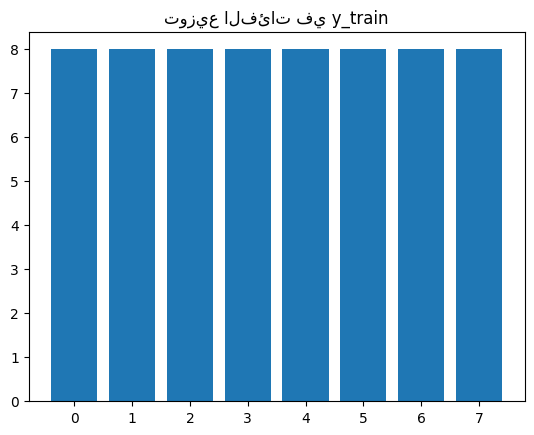

In [14]:
print(" الأبعاد النهائية:")
print(f"X_train: {X_train.shape} (عينات, إطارات, سمات)")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape} (تصنيفات)")
print(f"عدد الفئات: {len(le.classes_)}")

import matplotlib.pyplot as plt
plt.bar(*np.unique(y_train, return_counts=True))
plt.title("توزيع الفئات في y_train")
plt.show()

In [15]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"{le.inverse_transform([u])[0]}: {c}")


VAR: 8
بطاقة حمراء: 8
بطاقة صفراء: 8
تسلل: 8
ركلة جزاء: 8
ركلة حرة غير مباشرة: 8
ركلة حرة مباشرة: 8
مخالفة: 8


In [16]:
empty_frames_train = np.sum(np.all(X_train == 0, axis=2), axis=1)  
empty_frames_test = np.sum(np.all(X_test == 0, axis=2), axis=1)

print("أمثلة من الفيديوهات اللي فيها إطارات فارغة:")
print("train:", empty_frames_train[:10])
print("test:", empty_frames_test[:10])

num_with_empty_frames_train = np.sum(empty_frames_train > 0)
num_with_empty_frames_test = np.sum(empty_frames_test > 0)

print(f"\nعدد فيديوهات التدريب التي تحتوي على إطارات فارغة: {num_with_empty_frames_train}")
print(f"عدد فيديوهات الاختبار التي تحتوي على إطارات فارغة: {num_with_empty_frames_test}")


أمثلة من الفيديوهات اللي فيها إطارات فارغة:
train: [ 7 15  3  0 12 23 21 13 16 23]
test: [ 7 15  3  0 12 23 21 13 16 23]

عدد فيديوهات التدريب التي تحتوي على إطارات فارغة: 59
عدد فيديوهات الاختبار التي تحتوي على إطارات فارغة: 59


In [17]:


raw_class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

attenuation_factor = 0.3  
soft_weights = raw_class_weights ** attenuation_factor

class_weights = dict(enumerate(soft_weights))

for i, w in class_weights.items():
    print(f"الفئة {i}: الوزن = {round(w, 3)}")


الفئة 0: الوزن = 1.0
الفئة 1: الوزن = 1.0
الفئة 2: الوزن = 1.0
الفئة 3: الوزن = 1.0
الفئة 4: الوزن = 1.0
الفئة 5: الوزن = 1.0
الفئة 6: الوزن = 1.0
الفئة 7: الوزن = 1.0


soft class weight معالجة عدم توازن بين الفئات

In [18]:


def transformer_encoder(inputs, head_size=96, num_heads=4, ff_dim=4, dropout=0.1):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(
        key_dim=head_size // num_heads,
        num_heads=num_heads,
        dropout=dropout
    )(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="gelu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

def build_hybrid_model(input_shape, num_classes, mask_value=-10.0):
    inputs = Input(shape=input_shape)
    
    # Masking Layer
    masked = Masking(mask_value=mask_value)(inputs)
    
    # Transformer Branch
    x_trans = transformer_encoder(masked, head_size=96)
    x_trans = transformer_encoder(x_trans, head_size=48)
    x_trans = GlobalAveragePooling1D()(x_trans)
    
    # LSTM Branch
    x_lstm = LSTM(64, return_sequences=True)(masked)
    x_lstm = Dropout(0.3)(x_lstm)
    x_lstm = LSTM(32)(x_lstm)
    
    x = Concatenate()([x_trans, x_lstm])
    x = Dense(128, activation='gelu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    return Model(inputs, outputs)

input_shape = (X_train.shape[1], X_train.shape[2])  # (30, 108)
num_classes = len(np.unique(y_train))
model = build_hybrid_model(input_shape, num_classes)
model.summary()

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    class_weight=class_weights
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n accuracy on test set :accuracy")
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

2025-04-25 03:11:38.737600: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-25 03:11:38.826455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-25 03:11:38.826509: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-25 03:11:38.831931: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-25 03:11:38.832008: I tensorflow/compile

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 108)]    0           []                               
                                                                                                  
 masking (Masking)              (None, 60, 108)      0           ['input_1[0][0]']                
                                                                                                  
 layer_normalization (LayerNorm  (None, 60, 108)     216         ['masking[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 60, 108)     41868       ['layer_normalization[0][0]',

2025-04-25 03:11:46.386570: W tensorflow/core/common_runtime/type_inference.cc:339] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_FLOAT
    }
  }
}

	while inferring type of node 'cond_19/output/_22'
2025-04-25 03:11:47.900864: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-04-25 03:11:47.918628: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8907
2025-04-25 03:11:48.092946: I tensorflow/compiler/xla/servic

1/1 [==============================] - 10s 10s/step - loss: 2.3053 - accuracy: 0.1406 - val_loss: 1.8064 - val_accuracy: 0.3125
Epoch 2/20
1/1 [==============================] - 0s 142ms/step - loss: 1.8751 - accuracy: 0.2656 - val_loss: 1.5935 - val_accuracy: 0.3906
Epoch 3/20
1/1 [==============================] - 0s 140ms/step - loss: 1.7546 - accuracy: 0.2656 - val_loss: 1.4853 - val_accuracy: 0.3906
Epoch 4/20
1/1 [==============================] - 0s 135ms/step - loss: 1.6238 - accuracy: 0.2969 - val_loss: 1.3556 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 112ms/step - loss: 1.4898 - accuracy: 0.3750 - val_loss: 1.2579 - val_accuracy: 0.5781
Epoch 6/20
1/1 [==============================] - 0s 83ms/step - loss: 1.3855 - accuracy: 0.4062 - val_loss: 1.1362 - val_accuracy: 0.7031
Epoch 7/20
1/1 [==============================] - 0s 78ms/step - loss: 1.2736 - accuracy: 0.5469 - val_loss: 1.0396 - val_accuracy: 0.9062
Epoch 8/20
1/1 [==================


 accuracy on test set :accuracy
Loss: 0.2717, Accuracy: 0.8906


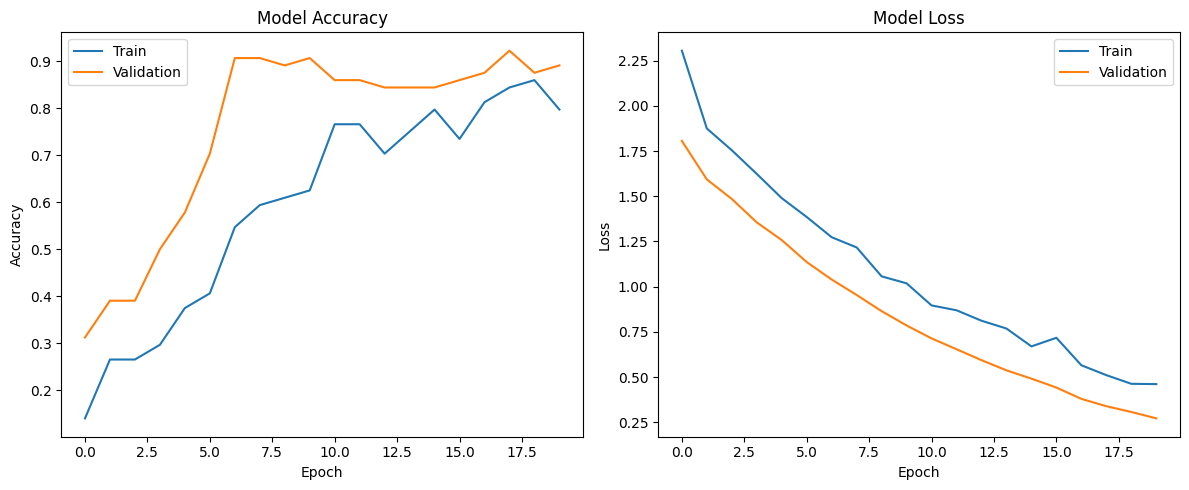

In [19]:
import matplotlib.pyplot as plt
print(f"\n accuracy on test set :accuracy")
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
# الدقة
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# الخسارة
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
